# Import package

In [1]:
import os
import pandas as pd
import numpy as np
from root_numpy import root2array 

Welcome to JupyROOT 6.20/04


$ cd <path_to_your_root_file>
$　root XXX.root
[root] _file0->ls()
[root] Delphes->MakeClass()

# Load root file

In [44]:
# root_file = "./SVJ_pythia/Z1500/delphes_nolhe_Z1500_rinv_03.root" #your root file path
root_file = "./SVJ_pythia/Z2000/delphes_nolhe_Z2000_rinv_05.root" #your root file path
# root_file = "./SVJ_pythia/Z1000/delphes_nolhe_Z1000_rinv_04.root" #your root file path



event = root2array(root_file, "Delphes;1", branches=[
"Particle.Status", "Particle.M1", "Particle.M2", "Particle.D1", "Particle.D2",
"Particle.PID", "Particle.PT",
"Particle.Eta","Particle.Phi", "Particle.Mass"], start=0, stop=1, step=None)
# in this example I set 
_Status, _M1, _M2, _D1, _D2, _PID, _PT, _Eta, _Phi, _Mass = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
Labels = ["Status", "M1", "M2", "D1", "D2", "PID", "PT", "Eta", "Phi", "Mass"]



# Show truth record

In [3]:
# Particle status in Pythia8: http://home.thep.lu.se/~torbjorn/pythia81html/ParticleProperties.html
print("Index", "\t","Status", "\t","M1" "\t","M2" ,"\t","D1", "\t","D2", "\t","PID", "\t\t","PT" "\t","Eta", "\t\t","Phi", "\t\t","Mass")
for j in range(len(event[0][0])):  
    print(j, "\t", event[0][_Status][j],  "\t\t", event[0][_M1][j], "\t", event[0][_M2][j], "\t", event[0][_D1][j], "\t", 
          event[0][_D2][j],  "\t", str(event[0][_PID][j]).ljust(12, ' '), "\t", round(event[0][_PT][j],0),  "\t",
          str(round(event[0][_Eta][j],2)).ljust(12, ' ') , "\t",str(round(event[0][_Phi][j],3)).ljust(12, ' '),  "\t",round(event[0][_Mass][j],3)) 
 

SyntaxError: unexpected EOF while parsing (<ipython-input-3-bfc1e4de8cf8>, line 7)

# Define function to trace particle decay

In [46]:
def find_decayratio(event,n, mode = 'daughter'):
    d1, d2 = -1, -1
    d0 = -1
    ID = 4900101 #Xd PID
    for j in  range(len(event[n][0])):
        if(event[n][5][j]==ID)&(event[n][0][j]==23): #23 : hardest outgoing particles
            d1 = event[n][_D1][j]
            d2 = event[n][_D2][j]
            while((event[n][_PID][d1]==ID)or(event[n][5][d2]==ID) ):
                if(event[n][_PID][d1]==ID):
                    d0 = d1
                    d1 = event[n][_D1][d0]
                    d2 = event[n][_D2][d0]
                    if(event[n][_PID][d2]==ID):
                        d0 = d2
                        d1 = event[n][_D1][d0]
                        d2 = event[n][_D2][d0]
                        
    if mode=='daughter':
        return d1, d2
    if mode=='id':
        return event[n][5][d1], event[n][5][d2]
    
def find_subdecayratio(event, n, j, ID=4900111): 
    d1, d2 = -1, -1
    d0 = -1
    d1 = event[n][_D1][j]
    d2 = event[n][_D2][j]
    if((abs(event[n][_PID][d1])!=ID)&(abs(event[n][_PID][d2])!=ID)):
        d1=0
        d2=0
        return d1, d2
    else:
        while((abs(event[n][_PID][d1])==ID)or(abs(event[n][_PID][d2])==ID) ):
            if(abs(event[n][_PID][d1])==ID):
                d0 = d1
                d1 = event[n][_D1][d0]
                d2 = event[n][_D2][d0]
            if(abs(event[n][_PID][d2])==ID):
                d0 = d2
                d1 = event[n][_D1][d0]
                d2 = event[n][_D2][d0]
        return event[n][_PID][d1], event[n][_PID][d2]
def find_daughterid(event, n, j, ID=4900111):
    sid = event[n][_PID][j]
    if(sid!=ID):
        return 0, 0
    else:
        d1 = event[n][_D1][j]
        d2 = event[n][_D2][j]
        return event[n][_PID][d1], event[n][_PID][d2]

        

# Trace certain particle ID untile it "decay" (daughter1!=daughter2)

In [60]:
n=0
ID=4900113
N = []
for j in  range(len(event[n][0])):
    if(event[n][_PID][j]==ID): #23 : hardest outgoing particles
        print("Self index in event",j)
        m1 = event[n][_M1][j]
        m2 = event[n][_M2][j]
        print("Mother:",m1,m2)
        if (m1==m2):
            print("Mother_id:", event[n][_PID][m1], "nan\n")
        else:
            print("Mother_id:", event[n][_PID][m1], event[n][_PID][m2],"\n")
        d1 = event[n][_D1][j]
        d2 = event[n][_D2][j]
        prevent = 0
        while(d1==d2): 
            d0 = d1
            if(d1==-1):
                print("stable particles\n\n")
                break
            if(prevent >= 100):
                print("infinite loop!")
                prevent=0
                break
            d1 = event[n][_D1][d1]
            d2 = event[n][_D2][d2]
            if(d1!=d2):
                N.append(d0)
            prevent= prevent+1
        if(d1!=-1):
            print("Daughter", d1, d2)
            print("Daughter_id", event[n][_PID][d1], event[n][_PID][d2])
            m1, m2 = event[n][_M1][d1], event[n][_M2][d1]
            print("Daughter1_parents", m1, m2)
            if(m1==m2):
                print("Daughter1_parents_id", event[n][_PID][m1], "nan") 
            else:
                print("Daughter1_parents_id", event[n][_PID][m1], event[n][_PID][m2])
            m1, m2 = event[n][_M1][d2], event[n][_M2][d2]
            print("Daughter2_parents", m1, m2)
            if(m1==m2): 
                print("Daughter2_parents_id", event[n][_PID][m1], "nan","\n")
            else:
                print("Daughter2_parents_id", event[n][_PID][m1], event[n][5][m2],"\n")

Self index in event 751
Mother: 705 750
Mother_id: 4900101 -4900101 

Daughter 1246 1247
Daughter_id -2 2
Daughter1_parents 751 -1
Daughter1_parents_id 4900113 22
Daughter2_parents 751 -1
Daughter2_parents_id 4900113 22 

Self index in event 753
Mother: 705 750
Mother_id: 4900101 -4900101 

Daughter 1266 1267
Daughter_id 4900213 -4900213
Daughter1_parents 753 -1
Daughter1_parents_id 4900113 22
Daughter2_parents 753 -1
Daughter2_parents_id 4900113 22 

Self index in event 761
Mother: 705 750
Mother_id: 4900101 -4900101 

Daughter 1268 1269
Daughter_id 4900213 -4900213
Daughter1_parents 761 -1
Daughter1_parents_id 4900113 22
Daughter2_parents 761 -1
Daughter2_parents_id 4900113 22 

Self index in event 765
Mother: 705 750
Mother_id: 4900101 -4900101 

Daughter 1278 1279
Daughter_id 4900213 -4900213
Daughter1_parents 765 -1
Daughter1_parents_id 4900113 22
Daughter2_parents 765 -1
Daughter2_parents_id 4900113 22 

Self index in event 766
Mother: 705 750
Mother_id: 4900101 -4900101 

Daught

# Trace outgoing Xd (4900101) in hardest subprocess 
# And then record the dark meson decay

In [47]:
# 4900111 and 4900113 is unstable dark meson
a113 = []
a111 = []
for n in range(1000):
    a1, a2 = find_decayratio(event,n) # find Xd -> a1 a2
    d1a1 = find_daughterid(event, n, a1, ID=4900111) # check whether a1 is 4900111 and find it's daughter
    d2a1 = find_daughterid(event, n, a2, ID=4900111) # check whether a2 is 4900111 and find it's daughter
    
    d1a2 = find_daughterid(event, n, a1, ID=4900113) # check whether a1 is 4900113 and find it's daughter
    d2a2 = find_daughterid(event, n, a2, ID=4900113) # check whether a2 is 4900113 and find it's daughter

    a111.append(d1a1)
    a111.append(d2a1)
    a113.append(d1a2)
    a113.append(d2a2)

IndexError: index 1 is out of bounds for axis 0 with size 1

# Calculate the ratio of stable dark meson in above record

In [62]:
#find 4900211 in 4900111 decay record (Note 4900211 is stable dark meson)
r = [sum([1 for i in a111 for j in i if (abs(j)== 4900211)]), sum([1 for i in a111 for j in i if (abs(j)!= 4900211)&(j!=0)])] 
print("The number_4900211/number_others in 4900111 decay particles : ", r[0]/sum(r))

The number_4900211/number_others in 4900111 decay particles :  0.4393939393939394


In [63]:
#find 4900213 in 4900113 decay record (Note 4900211 is stable dark meson)
r = [sum([1 for i in a113 for j in i if (abs(j)== 4900213)]), sum([1 for i in a113 for j in i if (abs(j)!= 4900213)&(j!=0)])] 
print("The number_4900213/number_others in 4900113 decay particles :", r[0]/sum(r))

The number_4900213/number_others in 4900113 decay particles : 0.35870967741935483


# Load weights and jets

In [48]:
nevn=20000 # number of event you generate in madgraph
W =  root2array(root_file, "Delphes;1", branches=["Event.Weight"], start=0, stop=20000, step=None) #weight for each event
jet = root2array(root_file, "Delphes;1", branches=["Jet.PT", "Jet.Eta", "Jet.Phi", "Jet.Mass"], start=0, stop=20000, step=None)
W = [i[0][0] for i in W] #just reset the data structure to convenienc
root_file2 = "./SVJ_pythia/Z2000/delphes_nolhe_Z2000_rinv_01.root"
jet2 = root2array(root_file2, "Delphes;1", branches=["Jet.PT", "Jet.Eta", "Jet.Phi", "Jet.Mass"], start=0, stop=20000, step=None)
W2 =  root2array(root_file2, "Delphes;1", branches=["Event.Weight"], start=0, stop=20000, step=None)
W2 = [i[0][0] for i in W2]
#We set
_JPT, _JEta, _JPhi, _JMass = 0, 1, 2, 3

# Define invariant mass function

In [40]:
def mass_inv(jet):
#    ["FatJet.PT", "FatJet.Eta", "FatJet.Phi", "FatJet.Mass"] 
# formula https://en.wikipedia.org/wiki/Invariant_mass#As_defined_in_particle_physics
    M_inv = 2*jet[_JPT][0]*jet[_JPT][1]*(np.cosh(jet[_JEta][0]-jet[_JEta][1])-np.cos(jet[_JPhi][0]-jet[_JPhi][1]))
    return M_inv**0.5
def mas_in(jet,n):
#    ["FatJet.PT", "FatJet.Eta", "FatJet.Phi", "FatJet.Mass"] 
# formula https://en.wikipedia.org/wiki/Invariant_mass#As_defined_in_particle_physics
    M_inv = 2*jet[_JPT][n]*jet[_JPT][n]*(np.cosh(jet[_JEta][n]-jet[_JEta][n])-np.cos(jet[_JPhi][n]-jet[_JPhi][n]))
    return M_inv**0.5
def ET(jet,n):
    return (mas_in(jet,n)**2+jet[_JPT][n]**2)**0.5
def deltaPhi(phi1,phi2):
    x = phi1-phi2
    while x>= np.pi: x -= np.pi*2.
    while x< -np.pi: x += np.pi*2.
    return x    

def mass_T(jet):
    M_T=2*ET(jet,1)*ET(jet,0)*(1-np.cos(deltaPhi(jet[_JPhi][1],jet[_JPhi][0])) ) 
    return  M_T**0.5

# Jet selection and fill up with invariant mass

In [49]:
## ALTAS selection
m_inv = []
m_T = []
Wc = []
for i in range(len(jet)):
    if jet[i][0].shape[0]<2: #at least two jet
        continue
    if jet[i][_JPT][0]<440: # leading jet pt >= 440 Gev
        continue
    if jet[i][_JPT][1]<60: #sub-leading jet pt >= 60 Gev
        continue
    if abs(jet[i][_JEta][0]-jet[i][_JEta][1])>=1.2:
        continue
    m_inv.append(mass_inv(jet[i]))
    m_T.append(mass_T(jet[i]))
    Wc.append(W[i])
m_inv2 = []
m_T2 = []
Wc2 = []
for i in range(len(jet2)):
    if jet2[i][0].shape[0]<2:
        continue
    if jet2[i][0][0]<440:
        continue
    if jet2[i][0][1]<60:
        continue
    if abs(jet2[i][1][0]-jet2[i][1][1])>=1.2:
        continue
    m_inv2.append(mass_inv(jet2[i]))
    m_T2.append(mass_T(jet2[i]))
    Wc2.append(W2[i])

In [ ]:
## selection 2 ... NOT finish
m_inv = []
m_T = []
Wc = []
for i in range(len(jet)):
    if jet[i][0].shape[0]<2: #at least two jet
        continue
    if jet[i][_JPT][0]<440: # leading jet pt >= 440 Gev
        continue
    if jet[i][_JPT][1]<60: #sub-leading jet pt >= 60 Gev
        continue
#     if abs(jet[i][_JEta][0]-jet[i][_JEta][1])>=1.2:
#         continue
    m_inv.append(mass_inv(jet[i]))
    m_T.append(mass_T(jet[i]))
    Wc.append(W[i])
m_inv2 = []
m_T2 = []
Wc2 = []
for i in range(len(jet2)):
    if jet2[i][0].shape[0]<2:
        continue
    if jet2[i][0][0]<440:
        continue
    if jet2[i][0][1]<60:
        continue
#     if abs(jet2[i][1][0]-jet2[i][1][1])>=1.2:
#         continue
    m_inv2.append(mass_inv(jet2[i]))
    m_T2.append(mass_T(jet2[i]))
    Wc2.append(W2[i])

# Calculate the cross section in root

In [50]:
Xection = sum(W)/nevn
Xection_with_selection = sum(Wc)/nevn
Lumi = 37 #Luminosity fb^-1
expected_yield = (Xection)*Lumi*1000  #expected yield
expected_yield_c = (Xection_with_selection)*Lumi*1000 #expected yield
print("Cross section(pb) \t Cross section with selection(pb) \t Expected yield (tatal)\t Expected yield for Selection")
print(Xection,"\t",Xection_with_selection,"\t\t\t",expected_yield,'\t',expected_yield_c)

Cross section(pb) 	 Cross section with selection(pb) 	 Expected yield (tatal)	 Expected yield for Selection
0.13218407332897186 	 0.008770413265377284 			 4890.810713171959 	 324.5052908189595


# Plot

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


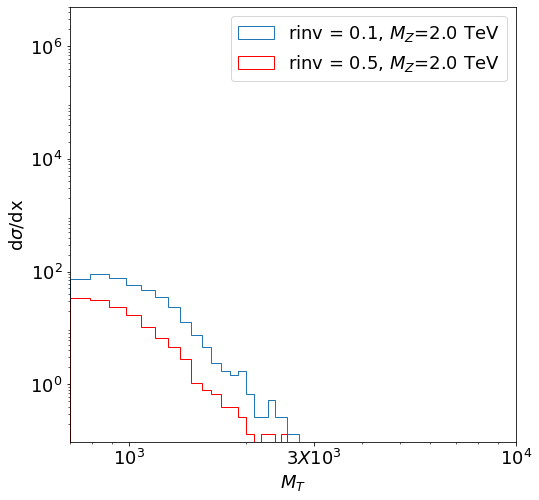

In [51]:
import matplotlib.pyplot as plt
bins = 100
fs=18 # front size
tagsize = 18 # label tag size ((\blue block) W \n (\orange block) QCD )
plt.figure(figsize=(8,8)) # plotsize
x1, x2 = 700, 10000

bisize = np.linspace(500,10000,101)


plt.hist(m_T2 ,bins=bins, histtype='step',  range=[x1, x2], weights= np.array(Wc2),
         label='rinv = 0.1, ${M_{Z}}$=2.0 TeV')
plt.hist(m_T ,bins=bins, histtype='step', color='r', range=[x1, x2], weights= np.array(Wc),
         label='rinv = 0.5, ${M_{Z}}$=2.0 TeV')

  
plt.legend(prop={'size': tagsize}) # plot label tag
plt.yscale('log')
plt.xscale('log')
plt.xlabel('${M_{T}}$' , fontsize=fs)  # plot x-axis label
plt.ylabel("d${\sigma}$/dx", fontsize=fs)  # plot y-axis label $\u03C3^{-1}$
plt.ylim((0,5000000))
plt.xlim((x1,x2))
plt.xticks([1000,3000,10000], ['${10^3}$', '3${X}$${10^{3}}$','${10^{4}}$' ],fontsize=fs)   # set x-ticks size
plt.yticks([1,100,10000,1000000],fontsize=fs)   # set y-ticks size 
plt.savefig("./invariant_mass_JET_SVJ_Z2000_Z2000.png")  #save figure as png  
plt.show() 